### Mestrado Profissional em Computação Aplicada

#### **Disciplina**: Redes Neurais Artificiais 
####  **Professor**: Dr. Francisco de Assis Boldt
#### **Aluno**: Adriel Monti De Nardi

------



#O Neurônio de Bias

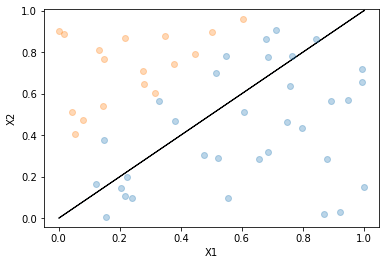

In [ ]:
#gera dataset e plota os dados 
import matplotlib.pyplot as plt
import numpy as np

def geradataset(tamanho=20):
    X = np.random.uniform(size=(tamanho,2))
    y = np.array(X[:,0]>X[:,1]-0.25, dtype=int)*2-1
    return X, y

def plotadataset(X, y):
    plt.xlabel('X1')
    plt.ylabel('X2')
    for k in set(y):
        plt.plot(X[:,0][y==k],X[:,1][y==k], "o", alpha=0.3)

def perpendicular(vetor):
    rotaciona = np.array([[0,1],[-1,0]])
    perp = np.matmul(vetor,rotaciona)
    return perp

X, y = geradataset(50)
plotadataset(X, y)
vetor = [1, -1]
hiperplano = perpendicular(vetor)
plt.arrow(*[0,0], *hiperplano)
plt.show()



[ True  True  True  True]
[ True  True  True  True]
[ True  True  True  True]
[ True  True  True  True]
[ True  True  True  True]
[[1.   0.   0.25]
 [1.   0.25 0.5 ]
 [1.   0.5  0.75]
 [1.   0.75 1.  ]]
[0. 0. 0. 0.]
[1, 0.125, 0.75]
Lado positivo ou negativo(-):  -0.375


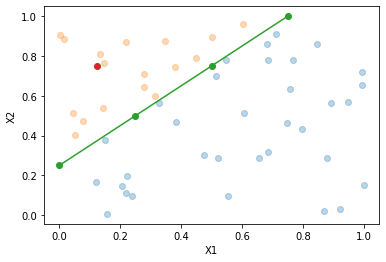

In [ ]:
#função que define nova linha separadora do hiperplano
def f(x1):
    return x1+0.25

#plota dataset
plotadataset(X, y)

#plota hiperplano separando positivos e negativos
x1 = np.array([0, 0.25, 0.5, 0.75])
x2 = f(x1)
plt.plot(x1, x2, 'o-')

print(x1 + 0.25 == x2)
print(x1 - x2 + 0.25 == 0)
print(0.25 + x1 - x2 == 0)
x0 = np.array([1, 1, 1, 1])
print(0.25*x0 + 1*x1 -1*x2 == 0)
print(x0*0.25 + x1*1 + x2*(-1) == 0)

coefs = np.array([0.25, 1, -1])
dados = np.stack((x0, x1, x2)).T
print(dados)

print(np.matmul(dados, coefs))

ponto = [0.125, 0.75]
plt.plot(*ponto, 'o')

#bias
p1 = [1]
p1.extend(ponto)
print(p1)
print("Lado positivo ou negativo(-): ",np.matmul(p1, coefs))

plt.show()

In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin

class Perceptron(BaseEstimator, ClassifierMixin):
    def __init__(self):
        self.w = None
        self.activation = lambda a: (a>=0)*2-1
        self.alpha = 0.5
        self.maxiter = 200
    
    @staticmethod
    def includebias(X):
        bias = np.ones((X.shape[0],1))
        Xb = np.concatenate((bias, X), axis=1)
        return Xb

    def fit(self, X, y):
        Xb = Perceptron.includebias(X)
        self.w = np.random.uniform(-1, 1, size=Xb.shape[1])
        for _ in range(self.maxiter):
            ypred = self.predict(X)
            erro = y - ypred
            custo = np.sum(erro**2)
            if custo==0:
                break
            self.w = self.w + self.alpha*np.matmul(erro, Xb)

    def predict(self, X):
        Xb = Perceptron.includebias(X)
        a = np.matmul(Xb, self.w)
        ypred = self.activation(a)
        return ypred

perceptron = Perceptron()
perceptron.fit(X, y)
ypred = perceptron.predict(X)
print(perceptron.w)
sum(y == ypred)/len(y)

[  7.06953395  42.71213247 -34.57258064]


1.0

#Como a taxa de aprendizado influencia na descida de gradiente

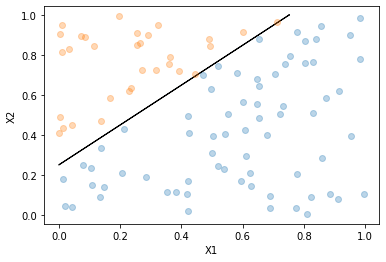

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def geradataset(tamanho=20):
    X = np.random.uniform(size=(tamanho,2))
    y = np.array(X[:,0]>X[:,1]-0.25, dtype=int)*2-1
    return X, y

def plotadataset(X, y):
    plt.xlabel('X1')
    plt.ylabel('X2')
    for k in set(y):
        plt.plot(X[:,0][y==k],X[:,1][y==k], "o", alpha=0.3)

def perpendicular(vetor):
    rotaciona = np.array([[0,1],[-1,0]])
    perp = np.matmul(np.array(vetor),rotaciona)
    return perp

def plotahiperplano(vetor, bias=0):
    hiperplano = perpendicular(vetor)
    plt.arrow(*[0,bias], *(hiperplano-bias))

X, y = geradataset(100)
plotadataset(X, y)
plotahiperplano([1,-1],0.25)
plt.show()


In [ ]:
class Adaline():
    def __init__(self):
        self.preactivated = True
    @staticmethod
    def erro(y, ypred):
        return y - ypred
    @staticmethod
    def custo(y, ypred):
        return np.sum((1 - Adaline.erro(y, ypred))**2)
    @staticmethod
    def gradiente(y, ypred, X):
        return np.matmul(Adaline.erro(y, ypred), X)

In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin

class Perceptron(BaseEstimator, ClassifierMixin):
    def __init__(self, custo=Adaline(), alpha=0.014):
        self.w = None
        self.activation = lambda a: (a>=0)*2-1
        self.alpha = alpha
        self.maxiter = 20
        self.custo = custo
        self.whist = []
        self.chist = []
    
    @staticmethod
    def includebias(X):
        bias = np.ones((X.shape[0],1))
        Xb = np.concatenate((bias,X), axis=1)
        return Xb

    def fit(self, X, y):
        Xb = Perceptron.includebias(X)
        self.w = np.random.uniform(-1, 1, size=Xb.shape[1])
        for _ in range(self.maxiter):
            if hasattr(self.custo, 'preactivated') and self.custo.preactivated:
                ypred = self.preactivate(X)
            else: 
                ypred = self.predict(X) 
            custo = self.custo.custo(y, ypred)
            print(custo)
            self.whist.append(self.w)
            self.chist.append(custo)
            if custo==0:
                break
            self.w = self.w + self.alpha*self.custo.gradiente(y, ypred, Xb)
        print(self.w)
    
    def preactivate(self, X):
        Xb = Perceptron.includebias(X)
        return np.matmul(Xb, self.w)

    def predict(self, X):
        a = self.preactivate(X)
        ypred = self.activation(a)
        return ypred

68.52124613284347
220.02117542996606
115.50139174478964
161.8180978332131
133.06349833052437
145.60927529825872
137.01398085266797
139.99671561804897
137.13969237722247
137.59065801629376
136.471506683081
136.33005540094598
135.7938334335515
135.56772824119827
135.26183278314653
135.0680498756272
134.8730833237901
134.72702285125814
134.59523874104875
134.48928196088752
[ 0.42316441  1.58290149 -1.52812496]
0.98


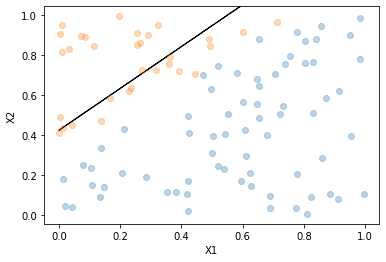

In [ ]:
perceptron = Perceptron(alpha=0.01)
perceptron.fit(X, y)
ypred = perceptron.predict(X)
print(sum(y == ypred)/len(y))

plotadataset(X, y)
plotahiperplano(perceptron.w[1:],perceptron.w[0])
plt.show()



In [ ]:
whist = np.array(perceptron.whist)
chist = np.array(perceptron.chist)
whist, chist

(array([[ 0.05719344,  0.50925039, -0.97418928],
        [ 0.64485869,  0.89668351, -0.73042356],
        [ 0.33348981,  0.82277878, -0.97735661],
        [ 0.49725536,  0.98147175, -0.95411224],
        [ 0.40960699,  1.0068361 , -1.06396585],
        [ 0.45473585,  1.0932555 , -1.09456688],
        [ 0.42953127,  1.13877338, -1.15899515],
        [ 0.44141216,  1.19804951, -1.198189  ],
        [ 0.4336034 ,  1.24286774, -1.2440404 ],
        [ 0.43614395,  1.28877215, -1.28029049],
        [ 0.4331678 ,  1.32811411, -1.31608573],
        [ 0.4330788 ,  1.36545811, -1.34709029],
        [ 0.4314463 ,  1.39886548, -1.37605209],
        [ 0.43062408,  1.42979457, -1.40193263],
        [ 0.42937714,  1.45786968, -1.4256582 ],
        [ 0.42836668,  1.48365033, -1.4470823 ],
        [ 0.42725004,  1.50717003, -1.46659474],
        [ 0.42621426,  1.52871166, -1.48427367],
        [ 0.42516538,  1.54840003, -1.5003364 ],
        [ 0.42415713,  1.56641961, -1.51490335]]),
 array([ 68.521246

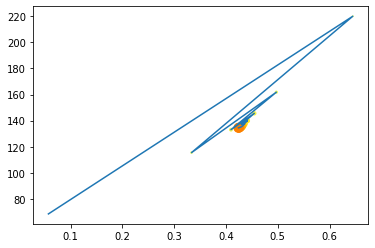

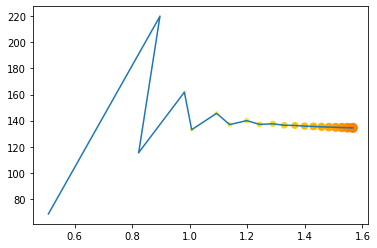

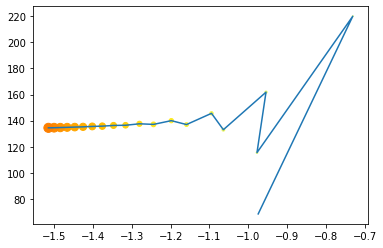

In [ ]:
for i in range(whist.shape[1]):
    plt.plot(whist[:,i], chist, '-')
    seq = [j**1.5 for j in range(len(chist))]
    plt.scatter(whist[:,i], chist, s=seq, c=seq, cmap='Wistia')
    idx = np.argsort(whist[:,i])
    # plt.plot(whist[idx,i],chist[idx])
    plt.show()

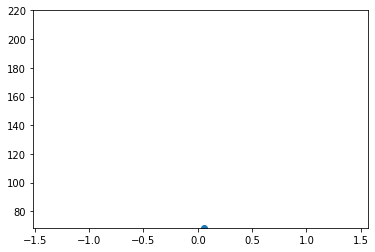

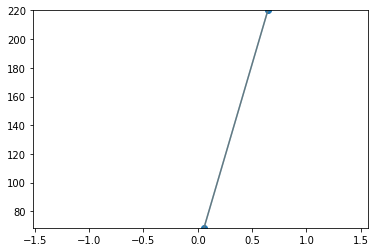

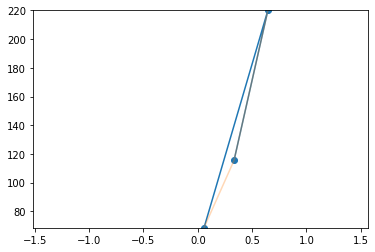

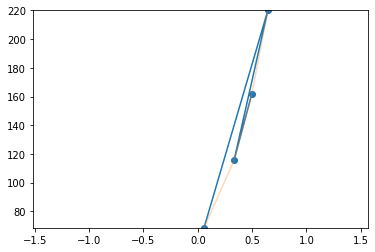

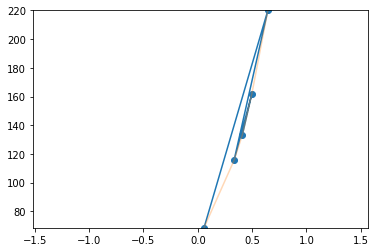

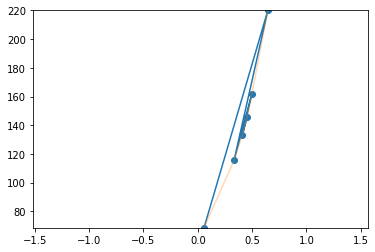

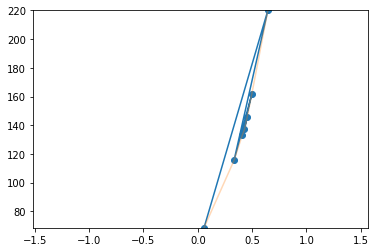

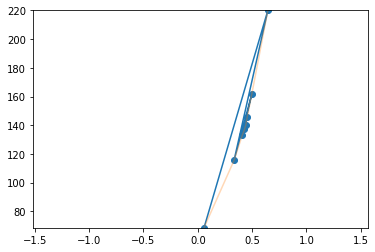

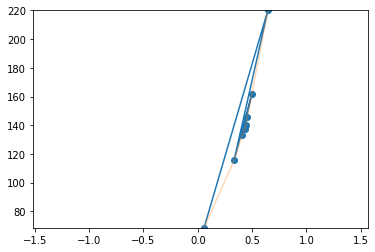

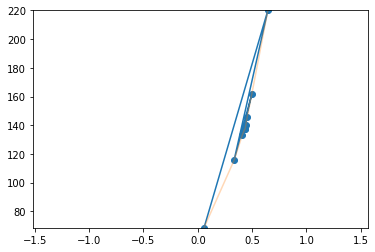

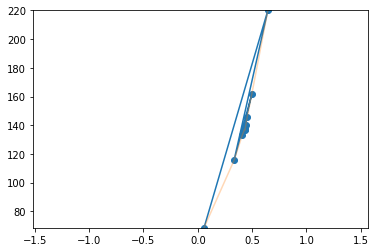

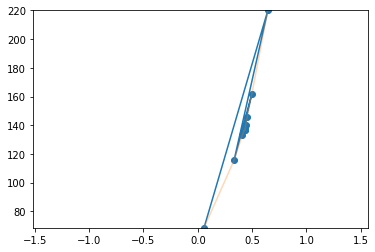

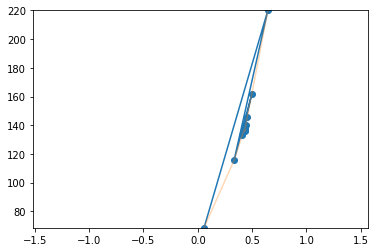

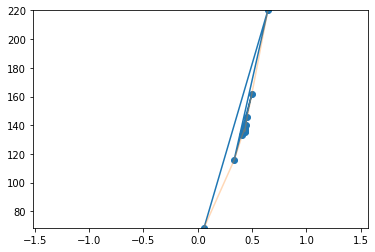

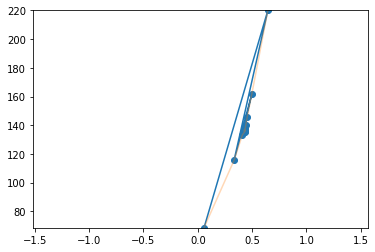

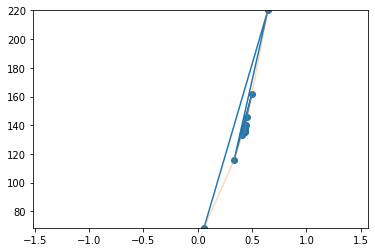

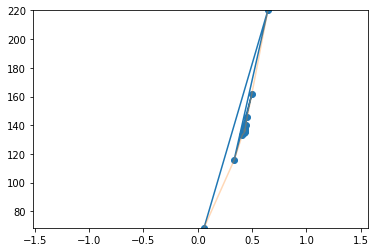

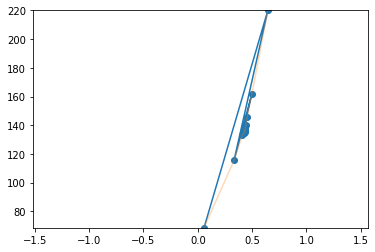

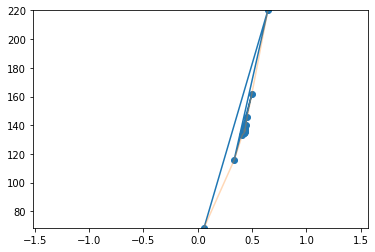

In [29]:
for i in range(1):
    for j in range(1,len(chist)):
        plt.plot(whist[:j,i], chist[:j], 'o-')
        idx = np.argsort(whist[:j,i])
        plt.plot(whist[idx,i], chist[idx], alpha=0.3)
        plt.xlim([np.min(whist), np.max(whist)])
        plt.ylim([np.min(chist), np.max(chist)])
        plt.show()